 ## Simulated Signal Data Generation
 The simulated signal for this example will be constructed by the combination of two Gaussian peaks with some
 overlap.  The height of each peak will be dependent on a concentration value.  The target value for each generated
 signal will be the concentration value.  The goal of the project will be correctly classify each sample based on
 the concentration value.

In [1]:
import os
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd 
from scipy.stats import norm    

mpl.style.use('seaborn-notebook')
plt.rcParams["figure.figsize"] = (12, 5)


 The following plot shows the separate Gaussian peaks used to generate the project test signal.  This sample signal
 was derived from an example in the
 [**Rampy**](https://github.com/charlesll/rampy/blob/master/examples/Baseline_and_Centroid_determination.ipynb) project.

Text(0.5, 0.98, 'Signal Base Gaussian Shapes')

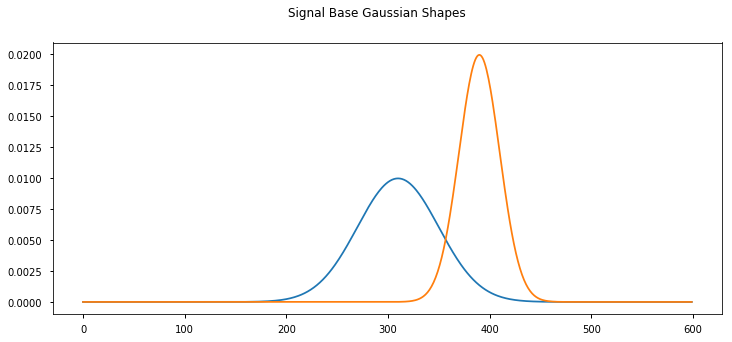

In [2]:
xnum = 600
np.random.seed(42)
x = np.arange(0, xnum, 1.0)
S_1 = norm.pdf(x, loc=310.0, scale=40.0)
S_2 = norm.pdf(x, loc=390.0, scale=20.0)
S_true = np.vstack((S_1, S_2))

fig, axs = plt.subplots()
axs.plot(x, S_1)
axs.plot(x, S_2)
fig.suptitle('Signal Base Gaussian Shapes')


 The following plot shows the combined Gaussian peaks with varying concentration levels.

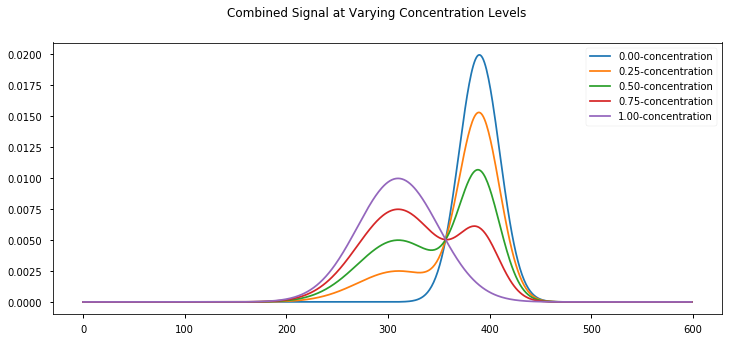

In [3]:
C_true = np.array([[0.0, 1.0], [0.25, 0.75], [0.5, 0.5], [0.75, 0.25], [1.0, 0.0]])
signal = np.dot(C_true, S_true)

fig, axs = plt.subplots()
for i, level in enumerate(C_true):
    axs.plot(x, signal[i], label='{0:.2f}-concentration'.format(C_true[i, 0]))
fig.suptitle('Combined Signal at Varying Concentration Levels')
plt.legend()


 ## Classification Problem Definition
 The goal of this project is to determine how well the different algorithms can classify
 the test signal when the concentration level is out of bounds.  The following plot shows the
 signal boundaries that should be considered a normal concentration level.

 This plot includes some random noise added to each signal.  The algorithms will be tested
 on generated datasets that include random noise.

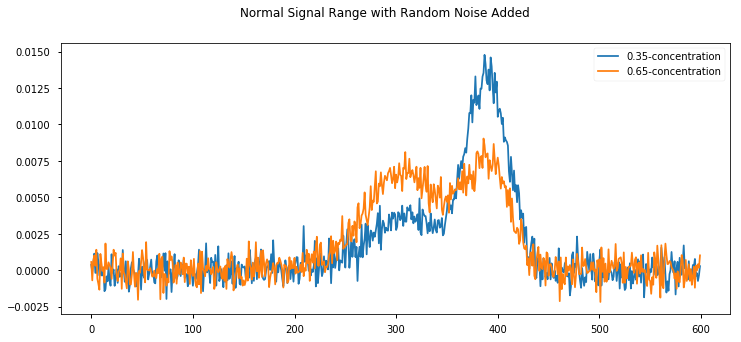

In [4]:
C_true = np.array([[0.35, 0.65], [0.65, 0.35]])
signal = np.dot(C_true, S_true)

fig, axs = plt.subplots()
for i, level in enumerate(C_true):
    noise = 0.00075 * np.random.normal(size=xnum)
    axs.plot(x, signal[i]+noise, label='{0:.2f}-concentration'.format(C_true[i, 0]))
fig.suptitle('Normal Signal Range with Random Noise Added')
plt.legend()
